In [124]:
import networkx as nx
import matplotlib.pyplot as plt
import gensim
import re
from networkx.algorithms import community

In [125]:
nouns = ['дрель', 'перфоратор', 'дюбель', 'скоба', 'сверло', 'гайка',
         'болт', 'гвоздь']
# семантическое поле вдохновлено соседями, которые две недели назад решили,
# что головная боль пойдет мне на пользу
words = [elem + '_NOUN' for elem in nouns]
Gm = nx.Graph()
Gm.add_nodes_from(nouns)

In [126]:
file = '/Users/Sasha/Downloads/ruscorpora_upos_skipgram_300_5_2018.vec'
if file.endswith('.vec'):
    model = gensim.models.KeyedVectors.load_word2vec_format(file, binary=False)
elif m.endswith('.bin'):
    model = gensim.models.KeyedVectors.load_word2vec_format(file, binary=True)
else:
    model = gensim.models.KeyedVectors.load(file)
model.init_sims(replace=True)

n = len(words)
for i in range(n-1):
    for j in range(i+1, n):
        if model.similarity(words[i], words[j]) > 0.5:
            Gm.add_edge(nouns[i], nouns[j])

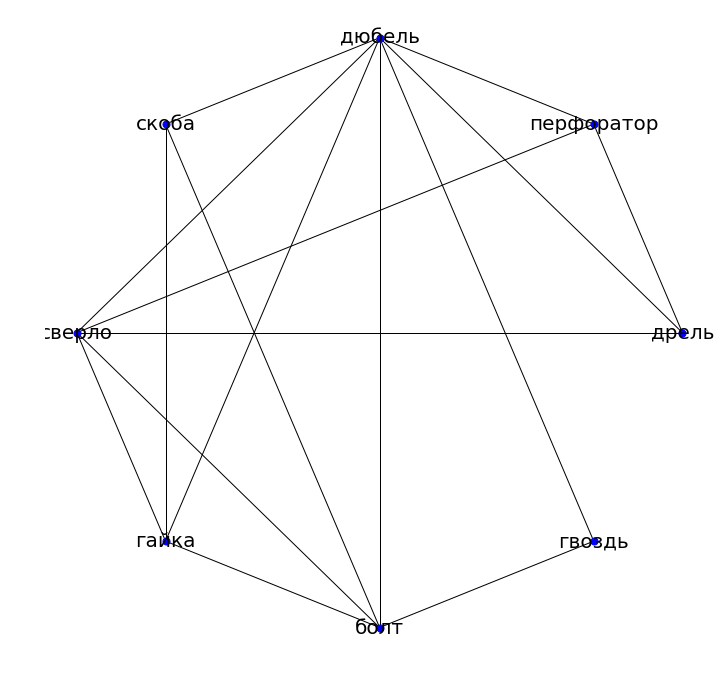

In [127]:
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(Gm)
nx.draw_networkx_nodes(Gm, pos, node_color='blue', node_size=50)
nx.draw_networkx_edges(Gm, pos, edge_color='black')
nx.draw_networkx_labels(Gm, pos, font_size=20)
plt.axis('off')
plt.savefig('shell_layout.png', dpi=200)
plt.show()

In [134]:
# расширяем семантическое поле, чтобы граф был более презентабельным
while len(words) < 100:
    if word in model:
        for i in model.most_similar(positive=[word], topn=20):
            if str(i[0]).endswith('_NOUN') and i[1] > 0.5:
                nouns_sort = re.findall(r"\b[а-яАя]*[^_NOU]", str(i[0]))
                sorted_tags = [elem + '_NOUN' for elem in nouns_sort]
                if nouns_sort not in nouns:
                    nouns.extend(nouns_sort)
                if sorted_tags not in words:
                    words.extend(sorted_tags)

G = nx.Graph()
G.add_nodes_from(nouns)

n = len(words)
# все еще нужна косинусная близость
for i in range(n-1):
    for j in range(i+1, n):
        if 1 > model.similarity(words[i], words[j]) > 0.5:
            # меньше единицы, чтобы одинаковые слова не образовывали пар
            G.add_edge(nouns[i], nouns[j])

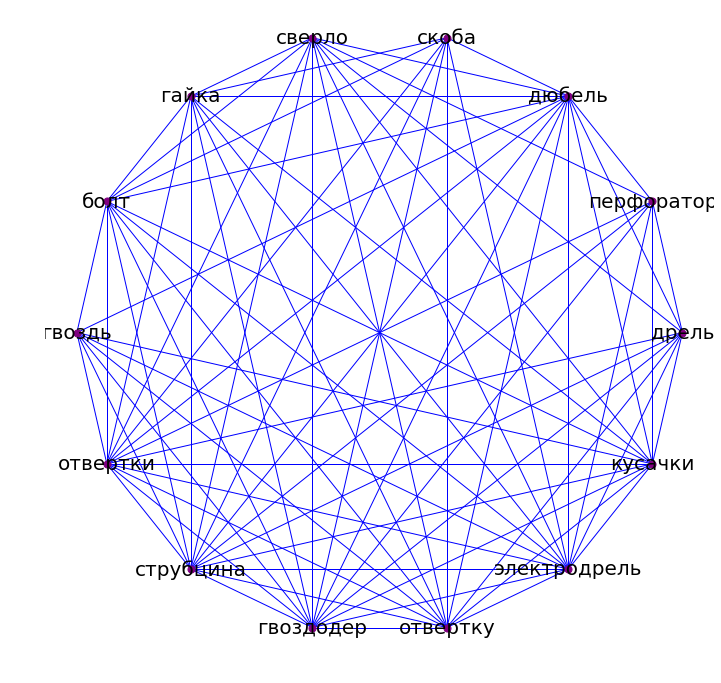

In [135]:
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='purple', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=20)
plt.axis('off')
plt.savefig('shell_layout.png', dpi=200)
plt.show()

In [130]:
# здесь выведем весь четвертый пункт домашки
# простите за отсутствие фунции,
#это все можно было бы оптимизировать и получше
deg = nx.degree_centrality(G)
i = 0
for nodeid in sorted(deg, key=deg.get, reverse=True):
    i += 1
    print('Degree centrality: ', nodeid, 
          round(deg[nodeid], 10))
    if i == 1:
        break
between = nx.betweenness_centrality(G)
i = 0
for nodeid in sorted(between, key=between.get, reverse=True):
    i += 1
    print('Betweenness centrality: ',
          nodeid, round(between[nodeid], 10))
    if i == 1:
        break
close = nx.closeness_centrality(G)
i = 0
for nodeid in sorted(close, key=close.get, reverse=True):
    i += 1
    print('Closeness centrality: ', nodeid,
          round(close[nodeid], 10))
    if i == 1:
        break
eigen = nx.eigenvector_centrality(G)
i = 0
for nodeid in sorted(eigen, key=eigen.get, reverse=True):
    i += 1
    print('Eigenvector: ', nodeid, round(eigen[nodeid], 10))
    if i == 1:
        break

Degree centrality:  гвоздодер 1.1538461538
Betweenness centrality:  дюбель 0.0253815629
Closeness centrality:  дюбель 1.0
Eigenvector:  гвоздодер 0.3251998594


In [131]:
# здесь выведем весь пятый пункт домашки
print('Плотность графа: ', nx.density(G))
print('Радиус графа: ', nx.radius(G))
print('Диаметр графа: ', nx.diameter(G))
print('Коеффициент ассортативности графа: ',
      nx.degree_pearson_correlation_coefficient(G))
print('Коэффициент кластеризации графа: ', nx.average_clustering(G))

Плотность графа:  0.8571428571428571
Радиус графа:  1
Диаметр графа:  2
Коеффициент ассортативности графа:  -0.25803480630120695
Коэффициент кластеризации графа:  0.8982711732711735


In [132]:
# здесь сообщества
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print('Выявленные сообщества:', sorted(map(sorted, next_level_communities)))

Выявленные сообщества: [['болт', 'гайка', 'гвоздодер', 'гвоздь', 'дюбель', 'кусачки', 'отвертки', 'отвертку', 'сверло', 'скоба', 'струбцина', 'электродрель'], ['дрель'], ['перфоратор']]


In [133]:
# Скорее всего гвоздь, 
# как и скоба,
# попадают в различные контексты в модели,
# распределяясь между членами бо'льшего сообщества
# равномерно. 
# Это позволяет им образовывать 
# независимые сообщества.